In [2]:
import pandas as pd
data = pd.read_csv('data/Advertising.csv', index_col=0) # use the first col as the index
data.head() # first five, or supply a param of how many rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape # A PROPERTY, NOT A METHOD

(200, 4)

### What are the features?

- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

So what is the response? Sales: sales of a single product in a given market (in thousands of items)

Because the response variable is a continuous series of numbers (not discreet categories) this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

## Visualizing the Data

In [5]:
import seaborn as sns
%matplotlib inline

Often you want to visualize the relationship between the features (in this case TV, Radio, Newspaper) and the target/reponse variable (Sales)...

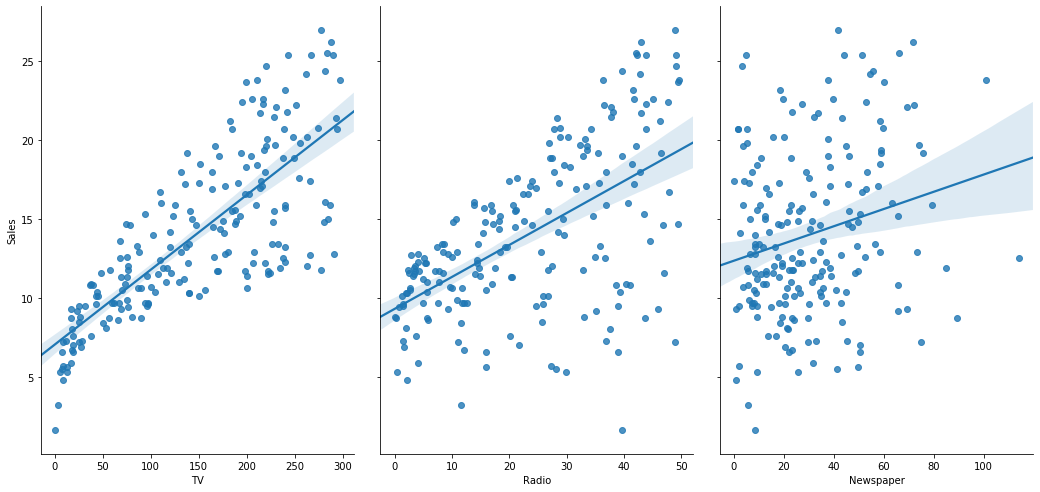

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=7, aspect=.7, kind='reg') 
# aspect is width as a ratio of height (aspect=1 would produce a square)
# kind='reg' adds a line of best fit and 95% confidence band

### Linear regression
**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

In [7]:
# Prepare the X and y variables for fitting to a ML algorithm...

X = data[['TV', 'Radio', 'Newspaper']]
X.head() # it still outputs the index column along with the 3 columns we requested

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
y = data.Sales # when there's no space in the name, can do this, otherise ... y = data['Sales']

print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [11]:
# 1) Import
from sklearn.linear_model import LinearRegression
# 2) Instantiate
linreg = LinearRegression()
# 3) Fit
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Video on what intercept is: https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/least-squares-regression/v/interpreting-y-intercept-in-regression-model
print(linreg.intercept_) # trailing _ is a scikitlearn convention indicating these attribiutes were estimated
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [42]:
list(zip(['TV', 'Radio', 'Newspaper'], linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

How do we interpret the TV coefficient (0.0466)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

This is a statement of **association**, not **causation**. So we're not saying that increasing TV add spending by $1000 CAUSES 46.6 more items to be sold, we're just saying it's ASSOCIATED with 46.6 more items being sold, in the sense that it may play a part in the CAUSE, but we're not claiming it IS the cause. 


- https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-expressions-and-variables/cc-6th-evaluating-expressions/v/expression-terms-factors-and-coefficients
- https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/proof-part-1-minimizing-squared-error-to-regression-line

"Minimize the squared error" - huh? (...I sort of get it now!)

In [ ]:
y_pred = linreg.predict(X_test)